/srv/env/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


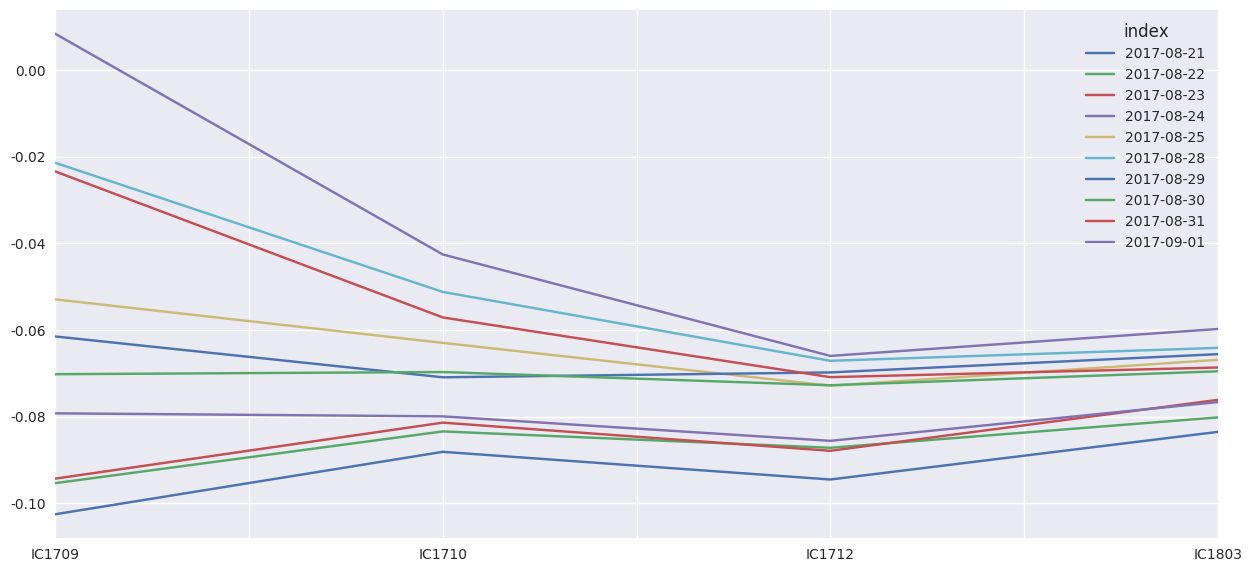

In [45]:
import seaborn
import datetime
import matplotlib.pyplot as plt

def get_pre_day(date,n):
    pre_date = date
    for i in range(n):
        pre_date = get_previous_trading_date(pre_date)
    return pre_date


universe = get_future_contracts('IC' ,date=datetime.datetime.now())
pre = get_pre_day(datetime.datetime.now(),10)
future = get_price(universe,pre,datetime.datetime.now(),'1d','basis_spread')
future['000905.XSHG'] = get_price('000905.XSHG',pre,datetime.datetime.now(),'1d','close')
future = future.reset_index()
for stk in universe:
    future[stk] = future[stk]/future['000905.XSHG']
    future[stk+'te'] = future['index'].apply(lambda x:instruments(stk).days_to_expire(date = x)/365)
    future[stk] = future[stk]/future[stk+'te']
future['index'] = future['index'].astype(str)
future.set_index('index',inplace = True)
fig, ax = plt.subplots(figsize=(15,7))
future[universe].T.plot(ax =ax)
plt.show()

In [106]:
future[universe]

,IC1709,IC1710,IC1712,IC1803
index,,,,
2017-08-21,-0.102551,-0.088138,-0.094528,-0.083536
2017-08-22,-0.095366,-0.083425,-0.087204,-0.080195
2017-08-23,-0.094327,-0.081398,-0.087899,-0.076139
2017-08-24,-0.079247,-0.079950,-0.085601,-0.076654
2017-08-25,-0.052940,-0.062986,-0.072881,-0.066898
2017-08-28,-0.021413,-0.051222,-0.067125,-0.064137
2017-08-29,-0.061504,-0.070932,-0.069804,-0.065590
2017-08-30,-0.070216,-0.069715,-0.072767,-0.069545
2017-08-31,-0.023414,-0.057117,-0.070899,-0.068674


/srv/env/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


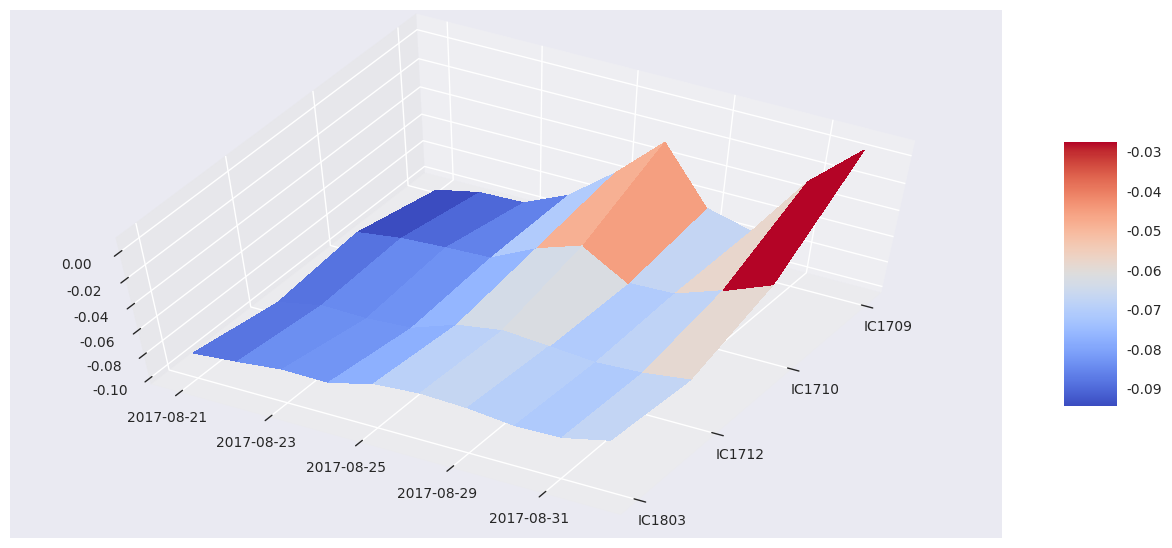

In [123]:
'''
=================
3D wireframe plot
=================

A very basic demonstration of a wireframe plot.
'''

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X = np.arange(4)
Y = np.arange(10)
X, Y = np.meshgrid(X, Y)
Z = np.array([future['IC1709'], future['IC1710'], future['IC1712'], future['IC1803']]).T
  
# Plot a basic wireframe.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xticks(range(4))
ax.set_xticklabels(['IC1709', 'IC1710', 'IC1712', 'IC1803'])
ax.set_yticklabels(future.index[::2])
ax.view_init(elev=60, azim=30)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(60, 30)
plt.show()


/srv/env/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


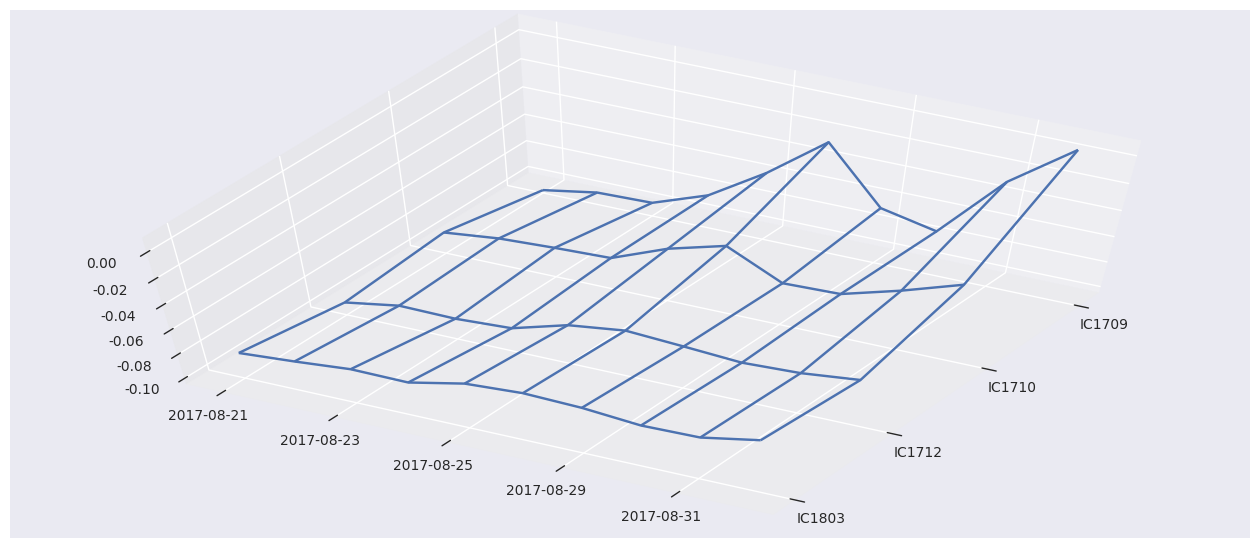

In [120]:
'''
=================
3D wireframe plot
=================

A very basic demonstration of a wireframe plot.
'''

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X = np.arange(4)
Y = np.arange(10)
X, Y = np.meshgrid(X, Y)
Z = np.array([future['IC1709'], future['IC1710'], future['IC1712'], future['IC1803']]).T
  
# Plot a basic wireframe.
surf = ax.plot_wireframe(X, Y, Z)
ax.set_xticks(range(4))
ax.set_xticklabels(['IC1709', 'IC1710', 'IC1712', 'IC1803'])
ax.set_yticklabels(future.index[::2])
ax.view_init(elev=60, azim=30)
plt.show()
